<a href="https://colab.research.google.com/github/DaniDelgon/Color-Transfer-Reinhard-et.-al-2001-vs-Image-Equalization/blob/main/Deterministic_Photo_Restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##(Attention: this notebook is made with the Google Colab online environment, and is best viewed in this virtual environment) 

# Color correction for old photos

In this notebook what we are going to perform is an implementation of the equalization of the color histogram of an old image to enhance its colors, giving an impression of new, or presence of vivid colors in the selected image.

#Equalization of images

In this section we will first visualize one of the images to which we are going to correct the coloration. In addition we will also visualize its histogram of colors per channel with the function we define as *rgb_hist(img)*. Then, we plot the accumulated histogram:

\begin{aligned}\\ H\left( i\right) =\sum^{i} _{j=0}h\left( j\right) : 0\leq i\leq L-1 \end{aligned} 

i = possible gray levels

h(i) = number of pixels of color channel i

H(i) = cumulative histogram (sum)

In the end, to find the transfer function from the original image to the equalized image we use the above cumulative line as follows:

\begin{aligned}\\s\left( i\right) =rnd \left[ \dfrac{L-1}{N}H\left( i\right) \right] : 0\leq i\leq L-1\end{aligned}

L = no. of levels of any RGB color channel

N = no. of total pixels in the image

In [1]:
from google.colab import files       #Estas dos celdas nos permiten subir las imágenes que vamos a necesitar para realizar la siguiente parte de nuestro trabajo
uploaded = files.upload()

Saving amanecer.jpg to amanecer.jpg
Saving anochecer.jpg to anochecer.jpg
Saving cabello-verde-2-819x1024.jpg to cabello-verde-2-819x1024.jpg
Saving campo.jpg to campo.jpg
Saving casas.jpg to casas.jpg
Saving corredor.jpg to corredor.jpg
Saving Ecualizacion1.JPG to Ecualizacion1.JPG
Saving Ecualizacion2.JPG to Ecualizacion2.JPG
Saving Ecualizacion3.JPG to Ecualizacion3.JPG
Saving edificio.jpg to edificio.jpg
Saving foto.png to foto.png
Saving foto-descolorida-2.jpg to foto-descolorida-2.jpg
Saving foto-descolorida-3.jpg to foto-descolorida-3.jpg
Saving frutas-verdes-3.jpg to frutas-verdes-3.jpg
Saving furniture.jpg to furniture.jpg
Saving hats.png to hats.png
Saving heces-verdes-1080x480.png to heces-verdes-1080x480.png
Saving houses.jpg to houses.jpg
Saving istockphoto-992348058-612x612.jpg to istockphoto-992348058-612x612.jpg
Saving lady.jpg to lady.jpg
Saving persona1.jpg to persona1.jpg
Saving persona12.png to persona12.png
Saving pintura1.jpg to pintura1.jpg
Saving pintura2.jpg to

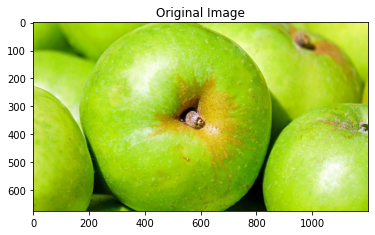

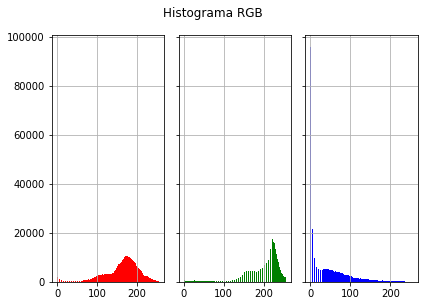

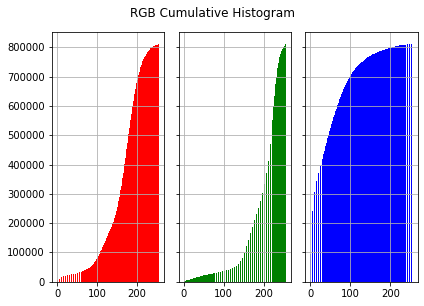

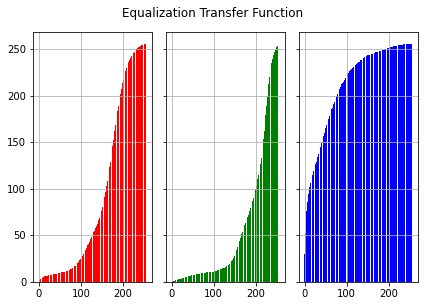

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def rgb_hist(img):                                                   #Function to plot the histogram of the RGB channels separately as a subplot of a specific image.
  uniquer, countsr = np.unique(img[:,:,0], return_counts=True)       #List of unique values and frequency list of each unique value of the R (red) channel of the image.
  uniqueg, countsg = np.unique(img[:,:,1], return_counts=True)       #List of unique values and frequency list of each unique value of the G (green) channel of the image.
  uniqueb, countsb = np.unique(img[:,:,2], return_counts=True)       #List of unique values and frequency list of each unique value of the B (blue) channel of the image.
  fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)      #Creation of a histogram for each color channel
  fig.suptitle('Histograma RGB',fontsize=12,y=1.05)
  axs[0].bar(uniquer, countsr,color='r')
  axs[0].grid()
  axs[1].bar(uniqueg, countsg,color='g')
  axs[1].grid()
  axs[2].bar(uniqueb, countsb,color='b')
  axs[2].grid()
  plt.show(fig)
  return countsr,countsg,countsb

levels=np.arange(0,256)                                              #Intensity levels for each image
img1=cv2.imread('frutas-verdes-3.jpg')[:, :, ::-1]
N=np.shape(img1)[0]*np.shape(img1)[1]                                #no. of pixels in the image
plt.title('Original Image')                                          #Plotting the original image
plt.imshow(img1)
countsr,countsg,countsb=rgb_hist(img1)
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)

fig.suptitle('RGB Cumulative Histogram',fontsize=12,y=1.05)        #We plot the cumulative histogram function of each color channel separately from the original image.
axs[0].bar(levels, np.cumsum(countsr),color='r')
axs[0].grid()
axs[1].bar(levels, np.cumsum(countsg),color='g')
axs[1].grid()
axs[2].bar(levels, np.cumsum(countsb),color='b')
axs[2].grid()
plt.show(fig)

fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)        #We plot the transfer function obtained from the cumulative histogram of each color channel of the original image.
fig.suptitle('Equalization Transfer Function',fontsize=12,y=1.05)
ftr=np.round((255/N)*np.cumsum(countsr))
ftg=np.round((255/N)*np.cumsum(countsg))
ftb=np.round((255/N)*np.cumsum(countsb))
axs[0].bar(levels, ftr,color='r')
axs[0].grid()
axs[1].bar(levels, ftg,color='g')
axs[1].grid()
axs[2].bar(levels, ftb,color='b')
axs[2].grid()
plt.show(fig)

Now we proceed to aply the equalization to the original image. Then we visualize the results.

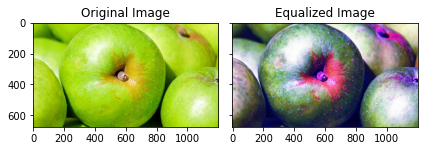

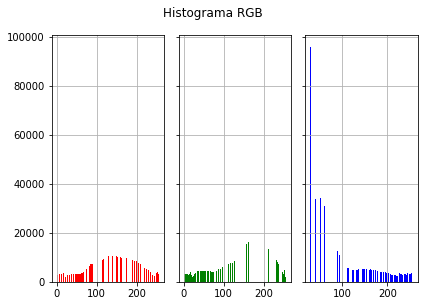

In [3]:
def ftranseq(image,ftrs):                                           #We vectorize the transfer function to pass it through all the elements of the original image array.
  image=ftrs[image]
  return image

f=np.vectorize(ftranseq)
f.excluded.add(1)
img2=np.zeros(np.shape(img1))                                       #Create an array of zeros with the same dimensions as the original image, this array will later contain the values of the equalized image.
img2[:,:,0]=f(img1[:,:,0],ftr)                                      #We apply the transfer function to each color channel.
img2[:,:,1]=f(img1[:,:,1],ftg)
img2[:,:,2]=f(img1[:,:,2],ftb)

img2=img2.astype(int)                                               #At the end, we plot the original image and the subsequently equalized image and its corresponding histogram.
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].imshow(img1)
axs[0].set_title('Original Image')
axs[1].imshow(img2)
axs[1].set_title('Equalized Image')
plt.show(fig)

countsr,countsg,countsb=rgb_hist(img2)                               #Now at last, we plot the Histogram from the equalized image.

Now we make a visualization of the effects of this equalization in some photos we could restore.

In [4]:
import cv2

def ftranseq(image,ftrs):                                           #We vectorize the transfer function to pass it through all the elements of the original image array.
  image=ftrs[image]
  return image

f=np.vectorize(ftranseq)
f.excluded.add(1)

def eq(img):
  countsr, bins1 = np.histogram(img[:,:,0].flatten(), range(257))
  countsg, bins1 = np.histogram(img[:,:,1].flatten(), range(257))
  countsb, bins1 = np.histogram(img[:,:,2].flatten(), range(257))
  N=np.shape(img)[0]*np.shape(img)[1]
  ftr=np.round((255/N)*np.cumsum(countsr))
  ftg=np.round((255/N)*np.cumsum(countsg))
  ftb=np.round((255/N)*np.cumsum(countsb))
  img1=np.zeros(np.shape(img))                                       #Create an array of zeros with the same dimensions as the original image, this array will later contain the values of the equalized image.
  img1[:,:,0]=f(img[:,:,0],ftr)                                      #We apply the transfer function to each color channel.
  img1[:,:,1]=f(img[:,:,1],ftg)
  img1[:,:,2]=f(img[:,:,2],ftb)
  return img1

def viseq(img):
  img=cv2.imread(img)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
  axs[0].imshow(img)
  axs[0].set_title('Original Image')
  img=eq(img)
  img=img.astype(int) 
  axs[1].imshow(img)
  axs[1].set_title('Equalized Image')
  plt.show(fig)

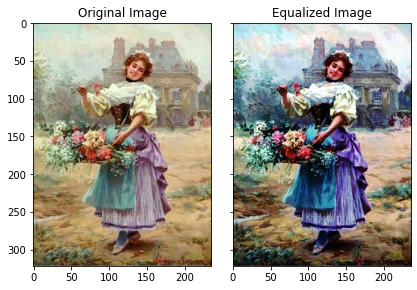

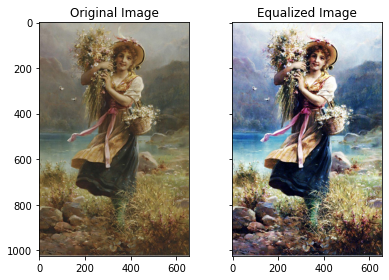

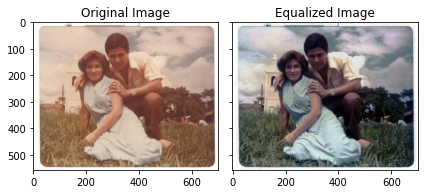

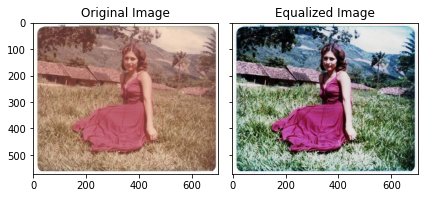

[None, None, None, None]

In [5]:
imgs=['pintura10.jpg','pintura7.jpg','foto-descolorida-3.jpg','foto-descolorida-2.jpg']
[viseq(i) for i in imgs]

The results can be acceptable, but for this part of this notebook we will compare this method to the implementation one paper based in image manipulation.

#Color Transfer, Reinhard et. al. (2001)

In this separate section, we are going to apply a color transfer from one image to another using the 'Color Transfer' algorithm proposed by Reainhard et. al (2001).

For this algorithm we are going to work in a color space other than RGB, the CIElab. The transformation from one color space to the other and vice versa is simply a coordinate transformation. This is already implemented in the Python Opencv library. So, we import the necessary libraries, and in addition, we uploade the original image and the target image to which we want to replicate the coloring style.

According to the algorithm described above, we need the means and standard deviations of each lab colour channel of the two images to be combined. So, we take a function that gives us these parameters and run it on the two images.

Function proposed by Reinhard:
\begin{aligned}I_{k}=\dfrac{\sigma _{t}^{k}}{\sigma _{s}^{k}}( S^{k}-mean(S^{k}))+mean(T^{k}),\space k=\left( l,\alpha ,\beta \right)\end{aligned}

\begin{aligned}S^{k}= pixeles\space imagen\space source\end{aligned}
\begin{aligned}T^{k}= pixeles\space imagen\space target\end{aligned}
\begin{aligned}\sigma _{t}^{k}= desviacion\space tpica\space imagen\space target\end{aligned}
\begin{aligned}\sigma _{s}^{k}= desviacion\space tpica\space imagen\space source\end{aligned}

In [89]:
import matplotlib.gridspec as gridspec

def getavgstd(image):                     #Creamos una función que nos retorne de una forma sencilla la media y la desviación típica de un array o canal de color de una imagen
  avg=image.mean(axis=(0,1))
  std=image.std(axis=(0,1))
  return avg,std

def Rein(source,target):                                                    #Creamos una función que nos permita obtener el array en tres dimensiones de la imagen resultado (Esta es una función que ya está bastante optimizada ya que hemos omitido bucles y demás)
  s = cv2.imread(source)
  t = cv2.imread(target)
  
  s = cv2.cvtColor(s,cv2.COLOR_BGR2LAB)
  t = cv2.cvtColor(t,cv2.COLOR_BGR2LAB)

  s_avg,s_std=getavgstd(s)
  t_avg,t_std=getavgstd(t)

  result=np.zeros(np.shape(s))

  result[:,:,0]=((s[:,:,0]-s_avg[0])*(t_std[0]/s_std[0]))+t_avg[0]
  result[:,:,1]=((s[:,:,1]-s_avg[1])*(t_std[1]/s_std[1]))+t_avg[1]
  result[:,:,2]=((s[:,:,2]-s_avg[2])*(t_std[2]/s_std[2]))+t_avg[2]
  result=np.clip(result,0,255)

  result = cv2.cvtColor(result.astype('uint8'),cv2.COLOR_LAB2RGB)
  return result

def vis(source,target,su):                                              #Esta función nos permite visualizar la imagen 'source', 'target' y 'resultado' en diferentes plots diferenciados
  result= Rein(source,target)
  s = cv2.imread(source)
  t = cv2.imread(target)
  
  s = cv2.cvtColor(s,cv2.COLOR_BGR2RGB)
  t = cv2.cvtColor(t,cv2.COLOR_BGR2RGB)

  plt.figure(figsize=(10, 7))
  G = gridspec.GridSpec(1, 3)

  axes_1 = plt.subplot(G[0, 0])
  axes_1.set_title('Target')
  axes_1.imshow(t)

  axes_2 = plt.subplot(G[0, 1])
  axes_2.set_title('Source')
  axes_2.imshow(s)

  axes_3 = plt.subplot(G[0, 2])
  axes_3.set_title('Result')
  axes_3.imshow(result)

  plt.tight_layout()
  plt.show()

  '''
  axs[0].set_title('Source')
  axs[0].imshow(s)
  axs[1].set_title('Target')
  axs[1].imshow(t)
  plt.show()

  plt.suptitle('Result')
  plt.imshow(result)
  plt.show()
  '''

  print('____________________________________________________')
  if su==1:
    return result

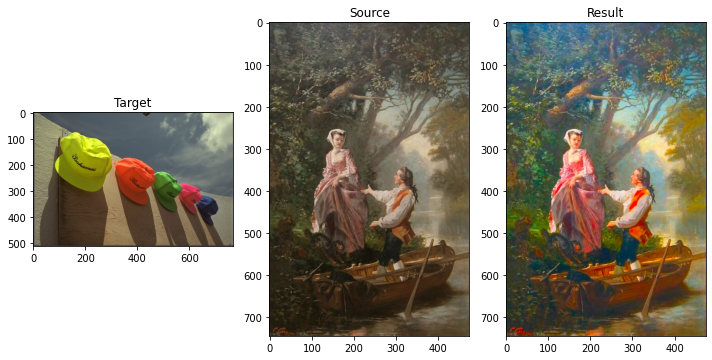

____________________________________________________


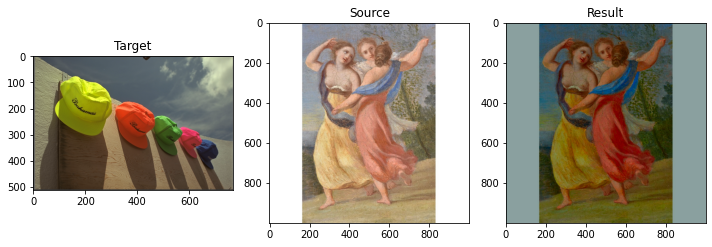

____________________________________________________


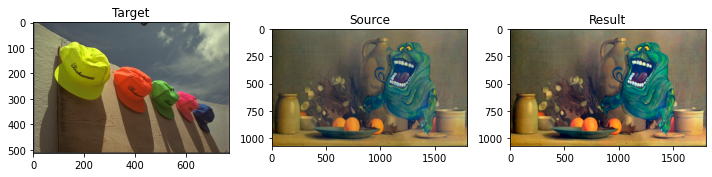

____________________________________________________


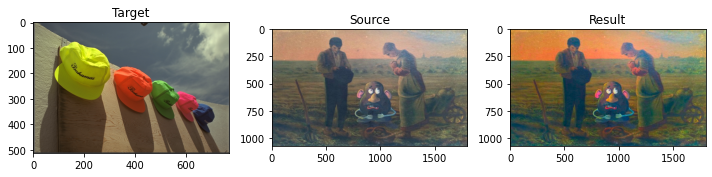

____________________________________________________


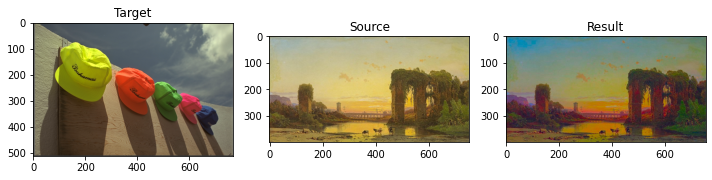

____________________________________________________


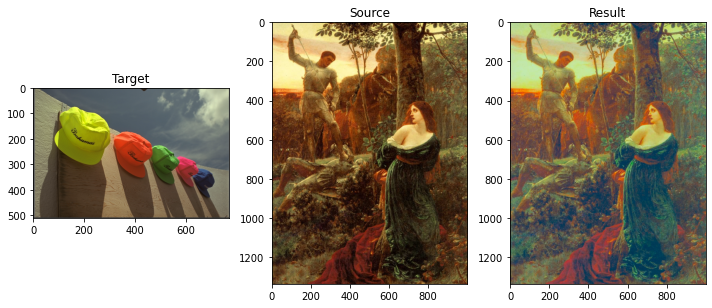

____________________________________________________


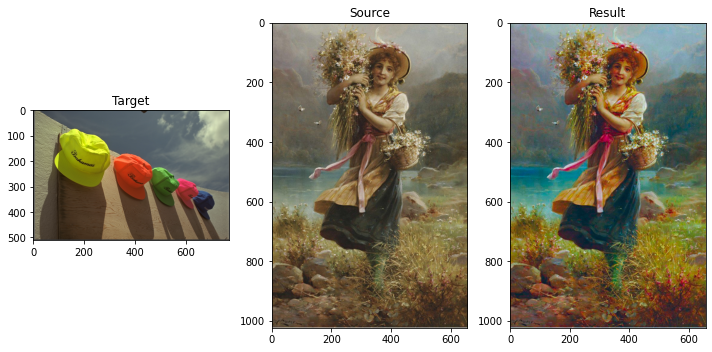

____________________________________________________


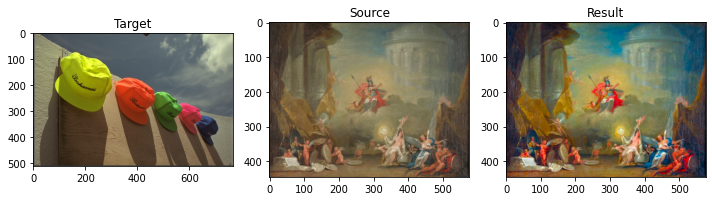

____________________________________________________


[None, None, None, None, None, None, None, None]

In [87]:
pinturas=['pintura1.jpg','pintura2.jpg','pintura3.jpg','pintura4.jpg','pintura5.jpg','pintura6.jpg','pintura7.jpg','pintura8.jpg']     #Elegimos una lista de imágenes de pinturas

[vis(i,'hats.png',0)for i in pinturas]  

We can even go so far as to give the resulting image a twilight effect by using a target image that is dark or taken at night. In the end, the quality of the final image will depend on the combination of original and target image we use.

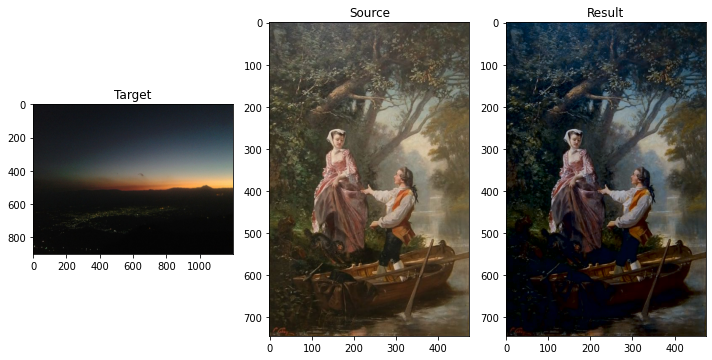

____________________________________________________


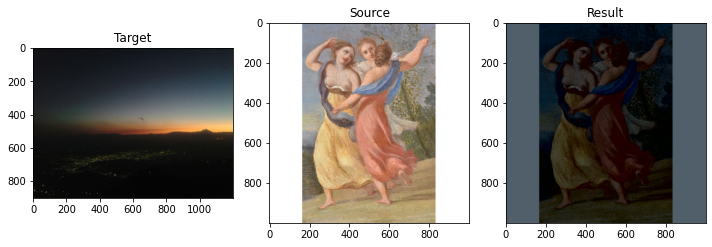

____________________________________________________


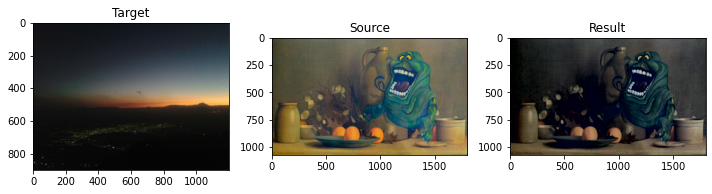

____________________________________________________


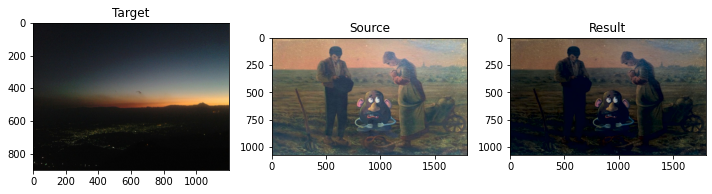

____________________________________________________


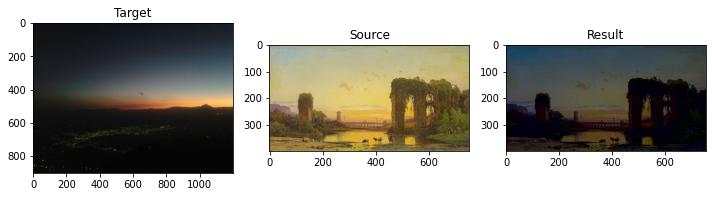

____________________________________________________


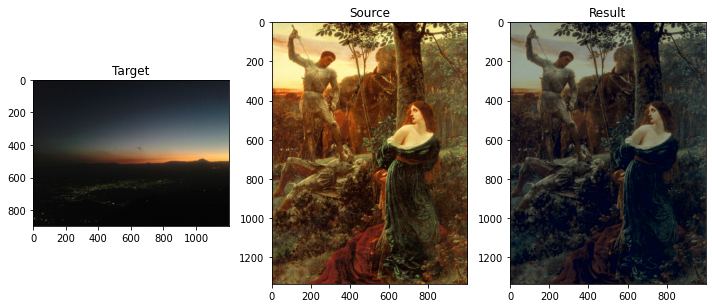

____________________________________________________


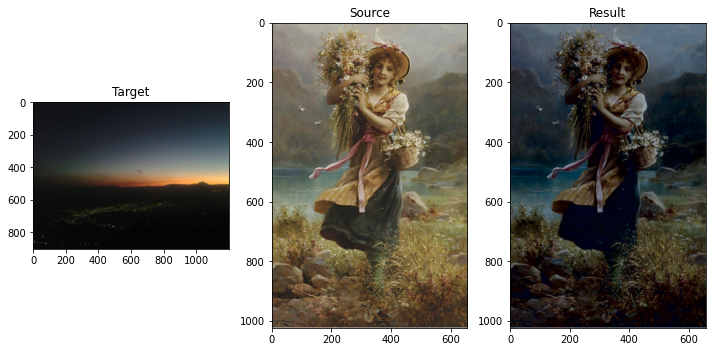

____________________________________________________


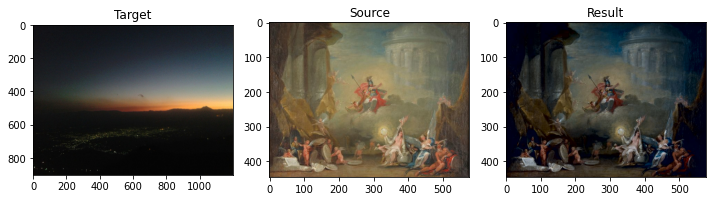

____________________________________________________


[None, None, None, None, None, None, None, None]

In [76]:
[vis(i,'anochecer.jpg',0)for i in pinturas]           #Aplicamos el método con una imagen 'target' oscura como es 'anochecer.jpg' y con las imágenes 'source' correspondientes a cada imagen de la lista de imágenes 

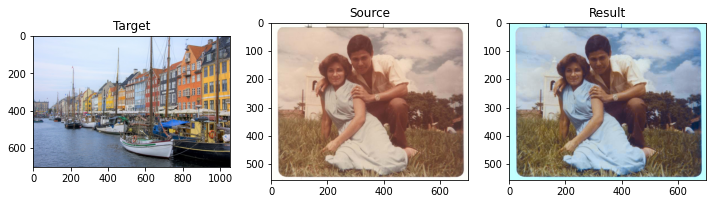

____________________________________________________


In [77]:
vis('foto-descolorida-3.jpg','target2.jpg',0)

#Comparison between Color Transfer (Reinhard et. al) and Image Equalization

Let's make a comparison with a specific image. First, for the Color Transfer method:

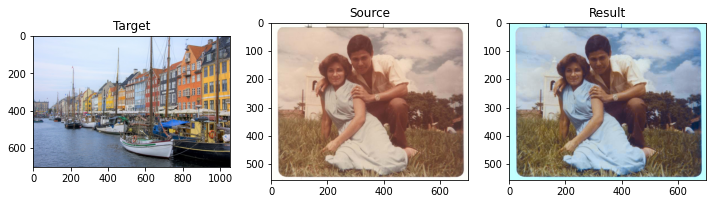

____________________________________________________


In [90]:
vis('foto-descolorida-3.jpg','target2.jpg',0)

Then, using image equalisation:

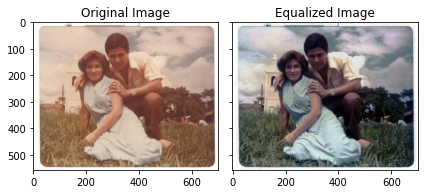

In [91]:
viseq('foto-descolorida-3.jpg')

Preference in photo restoration style is objective, so choosing one particular method over the other depends on the individual and their preferences. However, Reinhard's Color Transfer method allows us to obtain infinite results for the original image, as we can use an infinite number of 'target' images. In addition, this method allows more control over the style of the resulting image, as the colour style of the final image depends on the set of colours of the target image we use.

However, choosing the right target image to obtain a very specific end result can be a complex process, sometimes not being able to achieve the colour style we want to achieve for the final image.